In [2]:
# import dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import backend as K

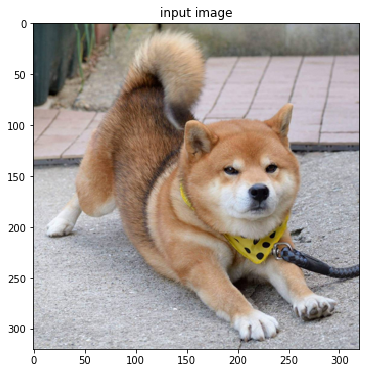

In [3]:
# Read in shiba.jpg as our input image
input_image = Image.open('shiba.jpg')
input_image.thumbnail((320, 320))
input_image = np.array(input_image)

plt.figure(figsize=(6, 6))
plt.title('input image')
plt.imshow(input_image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


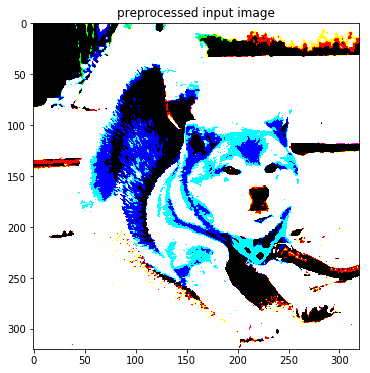

In [5]:
# preprocess image (i.e. center color values and convert RGB to BGR)
input_image = preprocess_input(input_image).reshape(1, 320, 320, 3)

# plot images
plt.figure(figsize=(6, 6))
plt.title('preprocessed input image')
plt.imshow(input_image[0], cmap='gray')

In [6]:
# Import VGG16 with pre-trained ImageNet weights.
model = VGG16(weights='imagenet', include_top=False)
print('VGG16 Architecture:')
model.summary()

VGG16 Architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0

In [16]:
# A loss function that maximizes the activation of a particular convolution
layer_output = model.get_layer('block4_conv2').output
layer_activ = K.mean(layer_output[:, :, :, 128])

# Computes the gradients w.r.t. the input image.
layer_grads = K.gradients(layer_activ, model.input)[0]

# Create a function that returns the to-be maximized activation and gradients
iterate = K.function([model.input], [layer_activ, layer_grads])

# start with image of Shiba
init = np.copy(input_image)

# Run gradient ascent to enhance image features
for i in range(30):
    activation, gradient = iterate([init])
    init += 1e3 * gradient

    print('Iter {}: mean activation:\t{}'.format(i+1, activation))
init = init[0, :, :, ::-1]

Iter 1: mean activation:	28.537988662719727
Iter 2: mean activation:	61.179874420166016
Iter 3: mean activation:	104.9412612915039
Iter 4: mean activation:	152.64105224609375
Iter 5: mean activation:	207.0977325439453
Iter 6: mean activation:	268.825927734375
Iter 7: mean activation:	336.0350646972656
Iter 8: mean activation:	408.9449157714844
Iter 9: mean activation:	487.974365234375
Iter 10: mean activation:	572.3076782226562
Iter 11: mean activation:	664.9120483398438
Iter 12: mean activation:	759.499755859375
Iter 13: mean activation:	853.126708984375
Iter 14: mean activation:	946.5265502929688
Iter 15: mean activation:	1041.7738037109375
Iter 16: mean activation:	1135.9683837890625
Iter 17: mean activation:	1228.529296875
Iter 18: mean activation:	1319.35888671875
Iter 19: mean activation:	1409.462158203125
Iter 20: mean activation:	1498.498291015625
Iter 21: mean activation:	1587.540283203125
Iter 22: mean activation:	1675.4710693359375
Iter 23: mean activation:	1764.779663085937

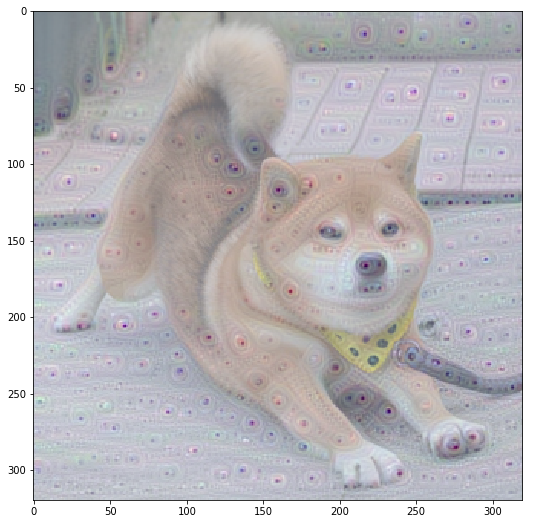

In [17]:
# normalize output to make sure that the image does 
# not clip and convert it back from BGR to RGB colorspace
init = init - np.min(init)
init = init / np.max(init)

# display image on screen
plt.figure(figsize=(9, 9))
plt.imshow(init)
plt.show()